In [17]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [6]:
print(df_kiva_loans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [7]:
print(df_mpi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB
None


In [9]:
data = df_kiva_loans.merge(df_mpi,how = 'left', on = 'country' )

In [10]:
print(data.head())

       id  funded_amount  loan_amount             activity sector  \
0  653051          300.0        300.0  Fruits & Vegetables   Food   
1  653051          300.0        300.0  Fruits & Vegetables   Food   
2  653051          300.0        300.0  Fruits & Vegetables   Food   
3  653051          300.0        300.0  Fruits & Vegetables   Food   
4  653051          300.0        300.0  Fruits & Vegetables   Food   

                                       use country_code   country region_x  \
0  To buy seasonal, fresh fruits to sell.            PK  Pakistan   Lahore   
1  To buy seasonal, fresh fruits to sell.            PK  Pakistan   Lahore   
2  To buy seasonal, fresh fruits to sell.            PK  Pakistan   Lahore   
3  To buy seasonal, fresh fruits to sell.            PK  Pakistan   Lahore   
4  To buy seasonal, fresh fruits to sell.            PK  Pakistan   Lahore   

  currency  ...  repayment_interval        date                  LocationName  \
0      PKR  ...           irregular

In [13]:
print(data.describe(include=[np.number]))

                 id  funded_amount   loan_amount    partner_id  \
count  7.996951e+06   7.996951e+06  7.996951e+06  7.924840e+06   
mean   9.922691e+05   6.081604e+02  6.413726e+02  1.828852e+02   
std    1.971461e+05   8.793740e+02  9.164127e+02  8.867705e+01   
min    6.530470e+05   0.000000e+00  2.500000e+01  9.000000e+00   
25%    8.193810e+05   2.250000e+02  2.250000e+02  1.360000e+02   
50%    9.884050e+05   3.750000e+02  4.000000e+02  1.450000e+02   
75%    1.162960e+06   6.750000e+02  7.250000e+02  2.040000e+02   
max    1.340339e+06   1.000000e+05  1.000000e+05  5.360000e+02   

       term_in_months  lender_count           MPI           lat           lon  
count    7.996951e+06  7.996951e+06  7.879324e+06  7.481747e+06  7.481747e+06  
mean     1.269593e+01  1.623748e+01  1.250728e-01  7.958587e+00  4.040228e+01  
std      7.591740e+00  2.356933e+01  1.326881e-01  1.181548e+01  8.172780e+01  
min      1.000000e+00  0.000000e+00  0.000000e+00 -3.040157e+01 -1.227471e+02  
25%  

In [14]:
print(data.describe(include=[np.object]))

<ipython-input-14-2b573af4e6f5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data.describe(include=[np.object]))


       activity       sector  \
count   7996951      7996951   
unique      163           15   
top     Farming  Agriculture   
freq     952960      2172386   

                                                      use country_code  \
count                                             7950282      7996847   
unique                                             424912           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                99123      2727497   

            country region_x currency                posted_time  \
count       7996951  7466880  7996951                    7996951   
unique           87    12695       67                     667399   
top     Philippines   Kaduna      PHP  2016-12-14 14:00:06+00:00   
freq        2727497   370000  2727480                         74   

                   disbursed_time                funded_time           tags  \
count                     7991888               

1.	Зависимость пола заемщика от региона планеты, сектора экономики

In [16]:
data['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in data['borrower_genders']]

In [19]:
data['world_region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Latin America and Caribbean',
       nan, 'East Asia and the Pacific', 'Arab States',
       'Europe and Central Asia'], dtype=object)

In [23]:
len(data)

7996951

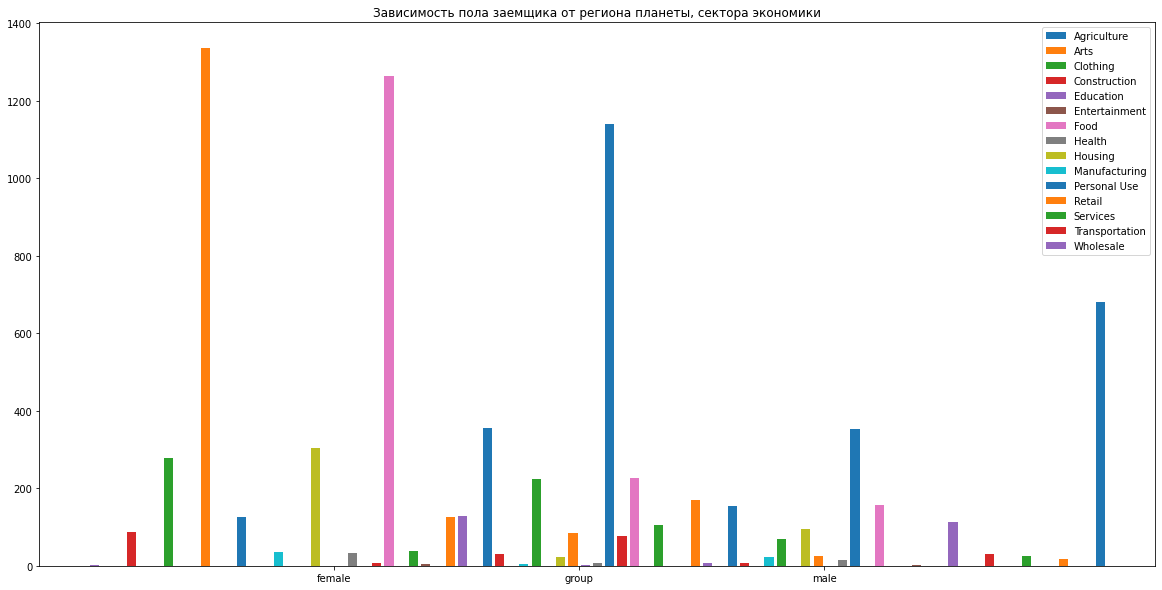

In [26]:
plt.figure(figsize = (20,10))
x = np.asarray([0,1,2])
width = 0.15
i = -7.5
for name, group in data.groupby(['sector']):
    plt.bar(x-i*width, group.groupby('borrower_genders').size().values/1000, width=width/4, label = name)
    i+=1
plt.title('Зависимость пола заемщика от сектора экономики')
plt.xticks(x,list(data.groupby('borrower_genders').groups.keys()))
plt.legend()

In [ ]:
plt.figure(figsize = (20,10))
x = np.asarray([0,1,2])
width = 0.15
i = -2.5
for name, group in data.groupby(['world_region']):
    plt.bar(x-i*width, group.groupby('borrower_genders').size().values/1000, width, label = name)
    i+=1
plt.title('Зависимость пола заемщика от региона планеты')
plt.xticks(x,list(data.groupby('borrower_genders').groups.keys()))
plt.legend()